## Observations and Insights 

In [286]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [287]:
# Checking the number of mice.
len(combined_data_df.drop_duplicates(subset=['Mouse ID'], keep='first'))

249

In [288]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicatelist = duplicate_mice_id[['Mouse ID']].to_numpy()
duplicatevalue = duplicatelist[1]
duplicateid = duplicatevalue[0]
duplicateid

'g989'

In [289]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_data_df.loc[combined_data_df['Mouse ID'] == duplicateid]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [290]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
columns = ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]
clean_df = combined_data_df.loc[combined_data_df["Mouse ID"] != duplicateid, columns]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [291]:
# Checking the number of mice in the clean DataFrame.
noduplicates = clean_df.drop_duplicates(subset=['Mouse ID'], keep='first')
len(noduplicates)

248

## Summary Statistics

In [292]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Find unique drug regime names and set up data statistics
regimens = clean_df["Drug Regimen"]
regimens = regimens.unique()
regimens = [regimens[0],regimens[1],regimens[2],regimens[3],regimens[4],regimens[5],regimens[6],regimens[7],regimens[8],regimens[9]]
ramicane = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
ramicane["Tumor Volume (mm3)"].mean()
ramicanedata = ["Ramicane", ramicane["Tumor Volume (mm3)"].mean(), ramicane["Tumor Volume (mm3)"].median(), ramicane["Tumor Volume (mm3)"].var(), ramicane["Tumor Volume (mm3)"].std(), ramicane["Tumor Volume (mm3)"].sem()]
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin["Tumor Volume (mm3)"].mean()
capomulindata = ["Capomulin", capomulin["Tumor Volume (mm3)"].mean(), capomulin["Tumor Volume (mm3)"].median(), capomulin["Tumor Volume (mm3)"].var(), capomulin["Tumor Volume (mm3)"].std(), capomulin["Tumor Volume (mm3)"].sem()]
infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']
infubinol["Tumor Volume (mm3)"].mean()
infubinoldata = ["Infubinol", infubinol["Tumor Volume (mm3)"].mean(), infubinol["Tumor Volume (mm3)"].median(), infubinol["Tumor Volume (mm3)"].var(), infubinol["Tumor Volume (mm3)"].std(), infubinol["Tumor Volume (mm3)"].sem()]
placebo = clean_df.loc[clean_df['Drug Regimen'] == 'Placebo']
placebo["Tumor Volume (mm3)"].mean()
placebodata = ["Placebo", placebo["Tumor Volume (mm3)"].mean(), placebo["Tumor Volume (mm3)"].median(), placebo["Tumor Volume (mm3)"].var(), placebo["Tumor Volume (mm3)"].std(), placebo["Tumor Volume (mm3)"].sem()]
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']
ceftamin["Tumor Volume (mm3)"].mean()
ceftamindata = ["Ceftamin", ceftamin["Tumor Volume (mm3)"].mean(), ceftamin["Tumor Volume (mm3)"].median(), ceftamin["Tumor Volume (mm3)"].var(), ceftamin["Tumor Volume (mm3)"].std(), ceftamin["Tumor Volume (mm3)"].sem()]
stelasyn = clean_df.loc[clean_df['Drug Regimen'] == 'Stelasyn']
stelasyn["Tumor Volume (mm3)"].mean()
stelasyndata = ["Stelasyn", stelasyn["Tumor Volume (mm3)"].mean(), stelasyn["Tumor Volume (mm3)"].median(), stelasyn["Tumor Volume (mm3)"].var(), stelasyn["Tumor Volume (mm3)"].std(), stelasyn["Tumor Volume (mm3)"].sem()]
zoniferol = clean_df.loc[clean_df['Drug Regimen'] == 'Zoniferol']
zoniferol["Tumor Volume (mm3)"].mean()
zoniferoldata = ["Zoniferol", zoniferol["Tumor Volume (mm3)"].mean(), zoniferol["Tumor Volume (mm3)"].median(), zoniferol["Tumor Volume (mm3)"].var(), zoniferol["Tumor Volume (mm3)"].std(), zoniferol["Tumor Volume (mm3)"].sem()]
ketapril = clean_df.loc[clean_df['Drug Regimen'] == 'Ketapril']
ketapril["Tumor Volume (mm3)"].mean()
ketaprildata = ["Ketapril", ketapril["Tumor Volume (mm3)"].mean(), ketapril["Tumor Volume (mm3)"].median(), ketapril["Tumor Volume (mm3)"].var(), ketapril["Tumor Volume (mm3)"].std(), ketapril["Tumor Volume (mm3)"].sem()]
propriva = clean_df.loc[clean_df['Drug Regimen'] == 'Propriva']
propriva["Tumor Volume (mm3)"].mean()
proprivadata = ["Propriva", propriva["Tumor Volume (mm3)"].mean(), propriva["Tumor Volume (mm3)"].median(), propriva["Tumor Volume (mm3)"].var(), propriva["Tumor Volume (mm3)"].std(), propriva["Tumor Volume (mm3)"].sem()]
naftisol = clean_df.loc[clean_df['Drug Regimen'] == 'Naftisol']
naftisol["Tumor Volume (mm3)"].mean()
naftisoldata = ["Naftisol", naftisol["Tumor Volume (mm3)"].mean(), naftisol["Tumor Volume (mm3)"].median(), naftisol["Tumor Volume (mm3)"].var(), naftisol["Tumor Volume (mm3)"].std(), naftisol["Tumor Volume (mm3)"].sem()]

# Set up summary data frame
statistics = [(ramicanedata),
              (capomulindata),
              (infubinoldata),
              (placebodata),
              (ceftamindata),
              (stelasyndata),
              (zoniferoldata),
              (ketaprildata),
              (proprivadata),
              (naftisoldata)]
statistics1_df = pd.DataFrame(statistics, 
                         columns = ['Drug Regimen', 'Mean' , 'Median', 'Variance', 'St. Dev.', 'SEM'])
statistics1_df = statistics1_df.set_index('Drug Regimen')
statistics1_df.sort_values('Drug Regimen', ascending=True)

,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [293]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

statistics2_df = pd.DataFrame({"Mean": mean,
                               "Median": median,
                               "Variance": var,
                               "St. Dev.": std,
                               "SEM": sem})
statistics2_df

,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

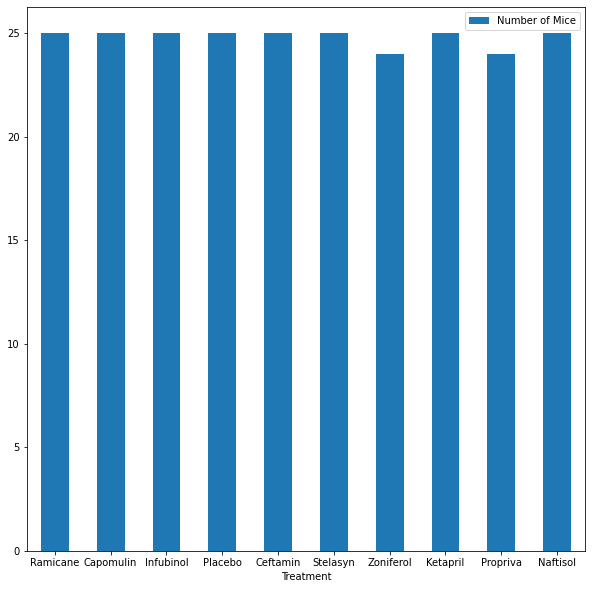

In [294]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count = noduplicates.groupby("Drug Regimen").count()["Mouse ID"]
df = pd.DataFrame({'Treatment':regimens, 
                   'Number of Mice':count})
ax = df.plot.bar(x='Treatment', y='Number of Mice', rot=0,figsize=(10,10))



Text(0, 0.5, 'Number of Mice')

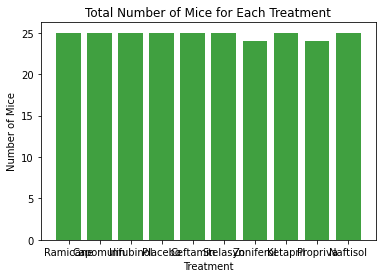

In [295]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = count
x_axis = regimens
plt.bar(x_axis, mice, color='g', alpha=.75, align="center")
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")


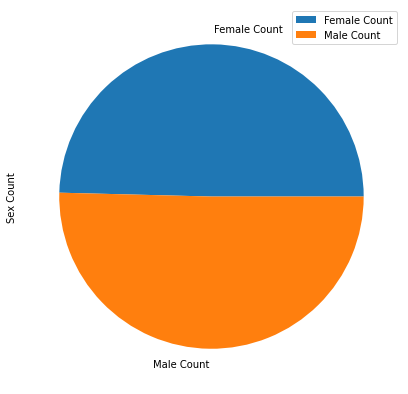

In [296]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexcount = noduplicates.groupby("Sex").count()["Mouse ID"]
df = pd.DataFrame({'Sex Count': distribution},
                  index=['Female Count', 'Male Count'])
plot = df.plot.pie(y='Sex Count', figsize=(7, 7))

([<matplotlib.patches.Wedge at 0x14692bb2a20>,
 [Text(-1.0999117423341975, 0.013934097579311333, 'Female Count'),
  Text(1.1999037189100337, -0.015200833722885236, 'Male Count')],
 [Text(-0.5999518594550168, 0.0076004168614425445, '49.6%'),
  Text(0.699943836030853, -0.008867153005016387, '50.4%')])

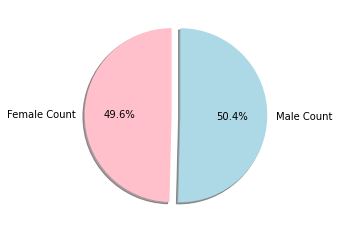

In [297]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'lightblue']
labels = ['Female Count', 'Male Count']
explode = [0, .1]
plt.pie(distribution, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [316]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lasttimepoints = clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_combined_data_df = pd.merge(study_results, lasttimepoints,
                                 how='outer', on='Mouse ID')
time_data_df = time_combined_data_df.drop_duplicates(subset=['Mouse ID'], keep='first')
time_data_df
clean_time_df = time_data_df.loc[time_data_df["Mouse ID"] != duplicateid]
clean_time_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,0,45.0,0,Capomulin,Female,9.0,22.0,45.0,38.982878,2.0
10,f932,0,45.0,0,Ketapril,Male,15.0,29.0,0.0,45.000000,0.0
11,g107,0,45.0,0,Ketapril,Female,2.0,29.0,35.0,71.905117,0.0
19,a457,0,45.0,0,Ketapril,Female,11.0,30.0,10.0,49.783419,0.0
22,c819,0,45.0,0,Ketapril,Male,21.0,25.0,40.0,62.175705,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20.0,17.0,45.0,34.455298,0.0
1858,i557,0,45.0,0,Capomulin,Female,1.0,24.0,45.0,47.685963,1.0
1868,m957,0,45.0,0,Capomulin,Female,3.0,19.0,45.0,33.329098,1.0
1878,f966,0,45.0,0,Capomulin,Male,16.0,17.0,20.0,30.485985,0.0


In [363]:
# Put treatments into a list for for loop (and later for plot labels) 
# (already did)
regimens

# Create empty list to fill with tumor vol data (for plotting)
voldata = clean_time_df['Tumor Volume (mm3)_y']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = voldata.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes    
correct_mice_df = clean_time_df.loc[(clean_time_df["Drug Regimen"] == 'Capomulin') | (clean_time_df["Drug Regimen"] == 'Ramicane') | (clean_time_df["Drug Regimen"] == 'Infubinol') | (clean_time_df["Drug Regimen"] == 'Ceftamin')]

# add subset 
correct_mice_voldata = correct_mice_df['Tumor Volume (mm3)_y']
correct_mice_voldata

# Determine outliers using upper and lower bounds
outliers = clean_time_df.loc[(clean_time_df["Tumor Volume (mm3)_y"] < lower_bound) | (clean_time_df["Tumor Volume (mm3)_y"] > upper_bound)]
print("There are no outliers")

Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.
There are no outliers


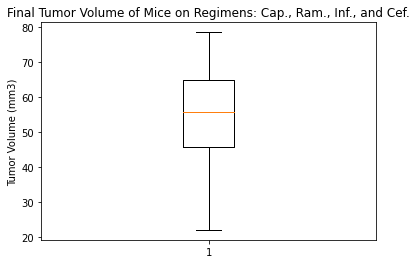

In [366]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Mice on Regimens: Cap., Ram., Inf., and Cef.')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(voldata)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
